In [45]:
%run BREPpy.py

import pdb

conn = Connector()
conn.init_from_script(['--config_fn','./input_files/Parameters.hoc',
                       '--goc_points_fn', './example_simulation/coordinates_input/GoCcoordinates.dat',
                      '--gc_points_fn', './example_simulation/coordinates_input/GCcoordinates.dat'])


p1 = './example_simulation/coordinates_input/'
p2 = './example_simulation/coordinates_input/subsampled/'

go_ori = p1+'GoCcoordinates.dat'
gr_ori = p1+'GCcoordinates.dat'
go_32 = p2+'GoCcoordinates_32.dat'
gr_32 = p2+'GCcoordinates_32.dat'
go_16 = p2+'GoCcoordinates_16.dat'
gr_16 = p2+'GCcoordinates_16.dat'
go_4 = p2+'GoCcoordinates_4.dat'
gr_4 = p2+'GCcoordinates_4.dat' 


empty_hoc = dir(neuron.hoc.HocObject()).copy()
config_fn = './input_files/Parameters.hoc'
neuron.h.xopen(config_fn)

#pdb.set_trace()


# Set up the Golgi population, render dendrites
gg = Golgi_pop(h)
gg.load_somata(go_32)
gg.add_dendrites()


#Set up Granule population including aa and pf
gp = Granule_pop(h)
gp.load_somata(gr_32)
gp.add_aa_endpoints_fixed()
gp.add_pf_endpoints()

#Build connector and obtain the connections
cc = Connect_2D(gg.qpts, gp.qpts_aa, 15)


In [46]:
r1, lr1 = cc.query_pts_in_lin()

In [47]:
#% run BREPpy.py
#cc = Connect_2D(gg.qpts, gp.qpts_aa, 15)
r2, lr2 = cc.query_lin_in_pts()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000


In [ ]:
#%run BREPpy.py


import matplotlib.pyplot as plt
%matplotlib inline
gg.plot_somata(True, 'ro')
gp.plot_somata(False, 'k.', markersize = 0.1)

In [19]:
print (len(r2[0]))

132


[12297  8151  1760  2443  3176    92  4118  4239  6080  6938 11428 11989
  5165 12628  6173   353  8116 12655 12892 12525 11980  8273 10213  4938
  6838   445  3261  1732  9739 12764 10062  6565  6472  7238  6085 12976
  1571  2896 11321  1690  9697  4482  1017  7053  1591 10247  7634 10436
  4158  4708  1498  8357  1039  6734  8963  3771 12437  8937  7740  6108
  2092   719 10439  6138  4057 11328 12755  3417  5231  9433  5868 11322
  7991  6137  5010 10736   369  2909  7939 11692]


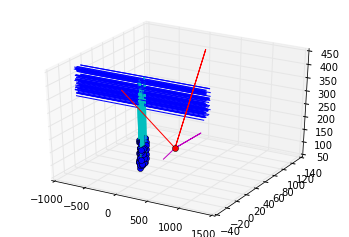

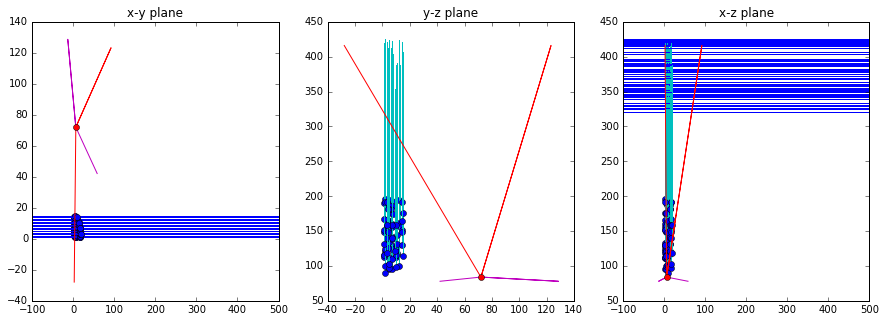

In [54]:
## plot some full cells
import matplotlib.pyplot as plt
%matplotlib inline

gr_pop = gp
go_pop = gg

m = 42

#gr_cells = [m] #np.random.randint(0, len(gr_pop.som), 10)
#go_cells = gg.qpts.idx[r2[m]].ravel() #np.random.randint(0, len(go_pop.som), 2)

go_cells = gg.qpts.idx[m]
gr_cells = r1[m]

print (r1[m])


# 3D plot
plt.figure()
ax = plt.gcf().gca(projection='3d')
def plot3d (ax, dat, *args, **kwargs):
    if len(dat.shape) == 1: #if single dot
        dat = np.expand_dims(dat, axis = 0)
    ax.plot(dat[:,0], dat[:,1], dat[:,2], *args, **kwargs)

for c in gr_cells:
    plot3d(ax, gr_pop.aa_dots[c], 'c')
    plot3d(ax, gr_pop.pf_dots[c], 'b')
    plot3d(ax, gr_pop.som[c], 'bo')

for c in go_cells:
    plot3d(ax, go_pop.a_dend[c], 'r')
    plot3d(ax, go_pop.b_dend[c], 'm')
    plot3d(ax, np.expand_dims(go_pop.som[c], axis = 0), 'ro')
    
    
#2D projections
plt.figure(figsize=(15,5))
for i, [j, k, tit] in enumerate([[0,1, 'x-y plane'], [1,2, 'y-z plane'], [0,2, 'x-z plane']]):
    
    plt.subplot(1,3,i+1)
    
    for c in gr_cells:
        plt.plot(gr_pop.aa_dots[c,:,j], gr_pop.aa_dots[c,:,k], 'c')
        plt.plot(gr_pop.pf_dots[c,:,j], gr_pop.pf_dots[c,:,k], 'b')
        plt.plot(gr_pop.som[c,j], gr_pop.som[c,k], 'bo')

    for c in go_cells:
        plt.plot(go_pop.a_dend[c,:,j], go_pop.a_dend[c,:,k], 'r')
        plt.plot(go_pop.b_dend[c,:,j], go_pop.b_dend[c,:,k], 'm')
        plt.plot(go_pop.som[c,j], go_pop.som[c,k], 'ro')
    
    if True:
        if i in [0,2]: plt.xlim([-100, 500])
    plt.title (tit)

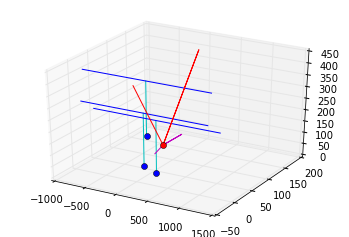

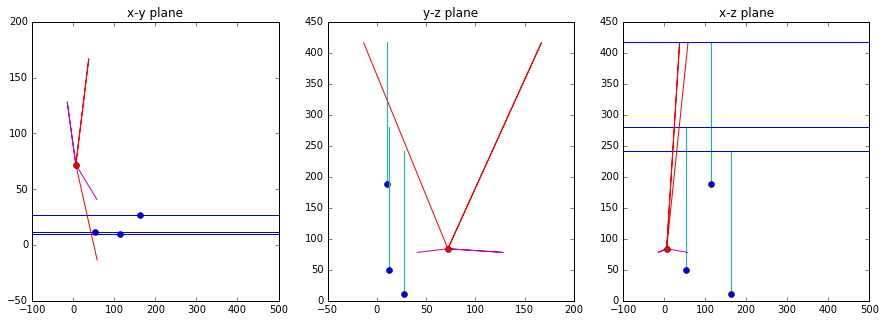

In [32]:
## plot some full cells
import matplotlib.pyplot as plt
%matplotlib inline

gr_pop = gp
go_pop = gg

a = np.random.randint(0, len(r2[0]), 5)
#ex = r2[a]


gr_cells = r2[0] #np.random.randint(0, len(gr_pop.som), 10)
go_cells = [0] #np.random.randint(0, len(go_pop.som), 2)


# 3D plot
plt.figure()
ax = plt.gcf().gca(projection='3d')
def plot3d (ax, dat, *args, **kwargs):
    if len(dat.shape) == 1: #if single dot
        dat = np.expand_dims(dat, axis = 0)
    ax.plot(dat[:,0], dat[:,1], dat[:,2], *args, **kwargs)

for c in gr_cells:
    plot3d(ax, gr_pop.aa_dots[c], 'c')
    plot3d(ax, gr_pop.pf_dots[c], 'b')
    plot3d(ax, gr_pop.som[c], 'bo')

for c in go_cells:
    plot3d(ax, go_pop.a_dend[c], 'r')
    plot3d(ax, go_pop.b_dend[c], 'm')
    plot3d(ax, np.expand_dims(go_pop.som[c], axis = 0), 'ro')
    
    
#2D projections
plt.figure(figsize=(15,5))
for i, [j, k, tit] in enumerate([[0,1, 'x-y plane'], [1,2, 'y-z plane'], [0,2, 'x-z plane']]):
    
    plt.subplot(1,3,i+1)
    
    for c in gr_cells:
        plt.plot(gr_pop.aa_dots[c,:,j], gr_pop.aa_dots[c,:,k], 'c')
        plt.plot(gr_pop.pf_dots[c,:,j], gr_pop.pf_dots[c,:,k], 'b')
        plt.plot(gr_pop.som[c,j], gr_pop.som[c,k], 'bo')

    for c in go_cells:
        plt.plot(go_pop.a_dend[c,:,j], go_pop.a_dend[c,:,k], 'r')
        plt.plot(go_pop.b_dend[c,:,j], go_pop.b_dend[c,:,k], 'm')
        plt.plot(go_pop.som[c,j], go_pop.som[c,k], 'ro')
    
    if True:
        if i in [0,2]: plt.xlim([-100, 500])
    plt.title (tit)

In [ ]:
qpt = Query_points(gg.som)

qpt.npts

In [ ]:
from neuron import hoc, h

%run BREPpy.py


empty_hoc = dir(neuron.hoc.HocObject()).copy()
config_fn = './input_files/Parameters.hoc'
#load our own hoc object from the parameter file, get the disjunct list of parameters (probably useless...)
neuron.h.xopen(config_fn)
gp = Granule_pop(h)
gp.load_somata('./example_simulation/coordinates_input/GCcoordinates.dat')


plt.figure()
ax = plt.gcf().gca(projection='3d')
ax.plot(gp.som[:,0], gp.som[:,1], gp.som[:,2], *args)

In [ ]:
from neuron import hoc, h

%run BREPpy.py
gp = Granule_pop('./example_simulation/coordinates_input/GCcoordinates.dat', h)
gp.add_aa_endpoints_random()



In [ ]:
    def read_in_config2 (self):
       '''checks if a config file has been specified, and if so, updates the args.
        If overwrite_config is set True, command line arguments that specify a parameter that also exists
        in the config file will have priority.'''
        if self.args.config_fn == '':
            warnings.warn('Cannot find config file!')
        else:  #read in config file using neurons h object
            self.p_verb('Reading config file')
            empty_hoc = dir(hoc.HocObject()).copy()
            neuron.h.xopen(self.args.config_fn)
            full_hoc = dir(neuron.h) 
        self.


In [ ]:
%run BREPpy.py

# Visualization of Golgi cells

For both the apical and the basal dendrites, a parameter GoC_*d_nseg is defined by `int((GoC_ApicalDendL/(GoC_d_lambda*GoC_d_lambda_f)+0.9)/2)*2 + 1 ` (analogous for BasolateralDendL)
Plugging in the values for the other parameters specified, I get that only if the length parameter GoC_**DendL is >= 488.6 (which seems an unlikely case), this parameter is not 1. (Values in the current config file are 166 for apical, 60 for basolateral)
I would like to understand what this parameter does and what it is used for (something cable equationish?)


# Visualization of Parallel fiber

# Visualization of Somata

# Single connection visualization

# Connection density visualization

In [ ]:
l = 166
fr = l/(0.1*1000*np.sqrt (3/(4*np.pi)))
print (fr)
nsegp = fr+0.9
nseg = int(nsegp/2)*2+1
print (nsegp)
print (nseg)


In [ ]:
int (0.9)

In [ ]:
b = 'ga'
print (type(b) == str)

In [ ]:
import threading
from queue import Queue
import time




In [ ]:
%connect_info #-> gives the number and the address of the kernel you use
%qtconsole #-> opens the console with iqdb
%debug #-> starts a iqdb pocess inline
#-> here, if you print debug, you will jump to the last error. Leave with q

# pdb.set_trace() -> 